Dataset shape: (7050, 16)
Preview dataset:
    status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      N

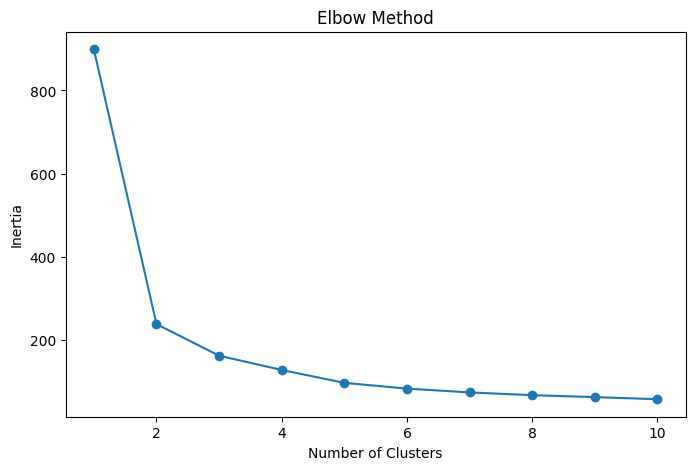

Cluster Centers:
 [[6.66666667e-01 5.50468724e-02 1.28134276e-03 6.06578001e-04
  5.44288747e-02 2.33696288e-03 2.86662977e-03 7.44732974e-04
  8.50678733e-03 8.93300248e-04]
 [3.28824477e-01 1.99952306e-02 6.50551332e-04 5.38187390e-04
  1.95245495e-02 1.93935250e-03 2.03054947e-03 1.16618973e-03
  2.84171640e-03 1.51940159e-03]
 [1.00000000e+00 5.43482082e-02 3.09368942e-02 3.41053640e-02
  4.56715783e-02 5.47278846e-02 8.90938744e-03 1.11816985e-02
  8.21030623e-03 8.29173483e-03]
 [4.37649880e-01 4.25867204e-01 3.14486857e-03 4.67604888e-03
  4.24440575e-01 5.54077286e-03 1.00926453e-02 1.46634285e-03
  7.75849908e-04 1.16036203e-04]]
Cluster assignments:
 Cluster
1    4141
2    2307
0     325
3     277
Name: count, dtype: int64
Clustered data saved to clustered_data.csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = 'Live.csv'  # Replace with the correct path to your dataset
df = pd.read_csv(file_path)

# Exploratory Data Analysis
print("Dataset shape:", df.shape)
print("Preview dataset:\n", df.head())
print("Dataset info:\n")
df.info()

# Handle missing values (drop redundant columns)
redundant_columns = ['Column1', 'Column2', 'Column3', 'Column4']
df.drop(redundant_columns, axis=1, inplace=True)

# Drop non-useful columns
non_useful_columns = ['status_id', 'status_published']
df.drop(non_useful_columns, axis=1, inplace=True)

# Encode categorical variable 'status_type'
le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])

# Feature scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)
X = pd.DataFrame(scaled_features, columns=df.columns)

# K-Means clustering with elbow method to find optimal K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# K-Means clustering with the optimal number of clusters (e.g., K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X)

# Cluster assignments and cluster centers
df['Cluster'] = kmeans.labels_
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster assignments:\n", df['Cluster'].value_counts())

# Save results to a new CSV file
output_file = 'clustered_data.csv'
df.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")


In [4]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=2b773844f5bfc74f60b1e65ac004a1c59c35894e45b6ecde50d3715cb759aa7e
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


Bartlett’s Test:
Chi-square value: 599960.2330493035, p-value: 0.0
KMO Test:
KMO model value: 0.7812331875744937


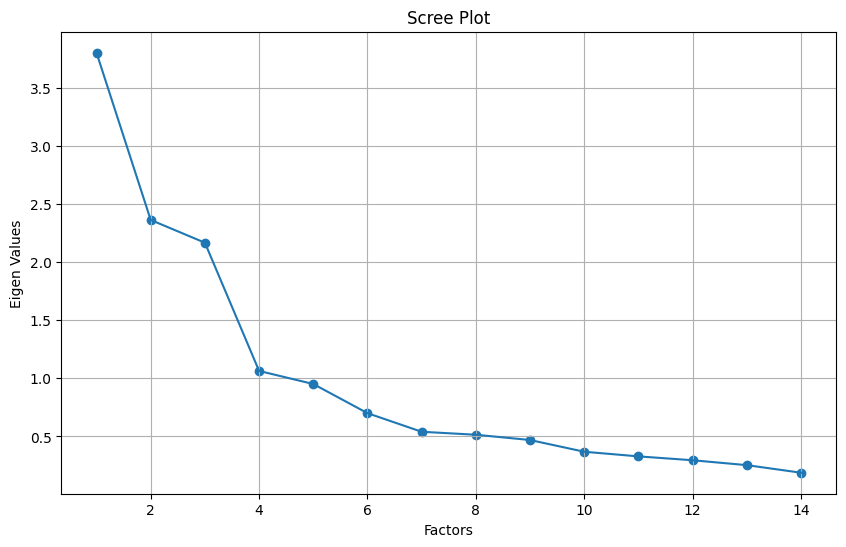

Optimal number of factors: 4
Factor Loadings:
                                     F1    F2    F3    F4
Inflight wifi service              0.09  0.13  0.61  0.48
Departure/Arrival time convenient -0.01  0.06  0.59  0.00
Ease of Online booking            -0.04  0.03  0.77  0.46
Gate location                      0.01 -0.05  0.68 -0.10
Food and drink                     0.77  0.00  0.03  0.04
Online boarding                    0.29  0.12  0.09  0.76
Seat comfort                       0.75  0.08 -0.03  0.21
Inflight entertainment             0.77  0.46  0.04  0.03
On-board service                   0.09  0.70  0.01  0.05
Leg room service                   0.06  0.48  0.04  0.10
Baggage handling                   0.04  0.76  0.05 -0.03
Checkin service                    0.12  0.29 -0.03  0.13
Inflight service                   0.04  0.80  0.05 -0.05
Cleanliness                        0.85  0.08 -0.00  0.10
Communalities:
                                   Communalities
Inflight wifi servic

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Load the dataset
# Make sure to replace 'data/flight.csv' with the actual path to your dataset
df_original = pd.read_csv("flight.csv", index_col='id')
df_original.dropna(inplace=True)
df_original = df_original.drop(columns=['Unnamed: 0'])

# Drop irrelevant columns
cols_to_drop = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                'Flight Distance', 'Departure Delay in Minutes',
                'Arrival Delay in Minutes', 'satisfaction']
df = df_original.drop(columns=cols_to_drop)

# Adequacy Tests: Bartlett’s and KMO
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("Bartlett’s Test:")
print(f"Chi-square value: {chi_square_value}, p-value: {p_value}")

kmo_all, kmo_model = calculate_kmo(df)
print("KMO Test:")
print(f"KMO model value: {kmo_model}")

# Choosing the number of factors using eigenvalues and scree plot
n_cols = df.shape[1]
fa = FactorAnalyzer(rotation=None, n_factors=n_cols)
fa.fit(df)

ev, _ = fa.get_eigenvalues()

# Plot eigenvalues
plt.figure(figsize=(10, 6))
plt.scatter(range(1, n_cols + 1), ev)
plt.plot(range(1, n_cols + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Values')
plt.grid()
plt.show()

# Selecting optimal number of factors (eigenvalues > 1)
n_factors = sum(ev > 1)
print(f"Optimal number of factors: {n_factors}")

# Fit the FactorAnalyzer with the optimal number of factors
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa.fit(df)

# Extract loadings
col_names = ["F" + str(i) for i in range(1, n_factors + 1)]
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=col_names)
print("Factor Loadings:")
print(loadings.round(2))

# Communalities
communalities = pd.DataFrame(fa.get_communalities(), index=df.columns, columns=['Communalities'])
print("Communalities:")
print(communalities.round(2))

# Specific Variance
var_ = np.diag(df.cov())
sp_var = var_ - np.array(communalities["Communalities"])
sp_var = pd.DataFrame(sp_var, index=df.columns, columns=['Specific Variance'])
print("Specific Variance:")
print(sp_var.round(2))

# Factor Variance
fac_var = pd.DataFrame(fa.get_factor_variance(),
                       index=['Variance', 'Proportional Var', 'Cumulative Var'],
                       columns=col_names)
print("Factor Variance:")
print(fac_var.round(2))

# Construct the final table
tab = pd.concat([loadings, communalities, sp_var], axis=1)
print("Final Factor Analysis Table:")
print(pd.concat([tab, fac_var]))

# Get factor scores
new_variables = fa.transform(df)
new_variables = pd.DataFrame(new_variables, index=df.index, columns=col_names)
print("Factor Scores:")
print(new_variables.head().round(2))

# Merge factor scores back into the original dataset
new_df = df_original[cols_to_drop].merge(new_variables, on='id', how='inner')
print("Merged Dataset with Factor Scores:")
print(new_df.head())
